# NBA ROY Prediction 

## Import modules

In [21]:
#essentials
import os
import pandas as pd
from tqdm import tqdm
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_selection import mutual_info_regression

#pandas show all columns
pd.set_option('display.max_columns', None)


### Read master data table

In [5]:
os.getcwd()

'/Users/nlrit3647/Documents/Python/Webscraping'

In [7]:
path = os.getcwd() + '/data' + '/master_table.csv'
master_table = pd.read_csv(path)

In [10]:
master_table.head()

,Rank,Player,Tm,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,year,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,OBPM,DBPM,BPM,VORP,W,L,W/L%
0,1,Phil Ford,KCK,0.939,79,34.5,15.9,2.3,8.6,2.2,0.1,0.465,0.000,0.813,5.7,0.101,1979,PG,15.8,0.534,0.000,0.399,1.3,6.1,3.6,32.2,2.9,0.1,21.5,21.2,2.5,3.2,0.9,0.0,0.9,2.0,48.0,34.0,0.585
1,2,Reggie Theus,CHI,0.061,82,33.6,16.3,2.8,5.2,1.1,0.2,0.480,0.000,0.761,3.2,0.056,1979,PG,13.3,0.526,0.000,0.310,3.7,5.4,4.5,22.8,1.6,0.3,19.2,22.9,1.5,1.7,-0.7,-1.2,-1.9,0.1,31.0,51.0,0.378
2,1,Larry Bird,BOS,0.955,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,1980,PF,20.5,0.538,0.098,0.246,8.3,23.6,16.0,18.5,2.3,1.0,14.0,25.3,5.6,5.6,3.0,1.5,4.5,4.8,61.0,21.0,0.744
3,2,Magic Johnson,LAL,0.045,77,36.3,18.0,7.7,7.3,2.4,0.5,0.530,0.226,0.810,10.5,0.180,1980,SG,20.6,0.602,0.033,0.487,7.1,15.4,11.6,25.2,3.1,0.8,20.9,20.9,6.2,4.3,3.1,1.7,4.8,4.8,60.0,22.0,0.732
4,1,Darrell Griffith,UTA,0.275,81,35.4,20.6,3.6,2.4,1.3,0.5,0.464,0.192,0.716,0.4,0.006,1981,SG,14.7,0.496,0.034,0.207,3.2,8.3,5.8,11.4,1.8,0.8,12.1,28.8,-0.8,1.1,-1.0,-2.2,-3.2,-0.9,28.0,54.0,0.341


## Exploratory Data Analysis

In [11]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    255 non-null    object 
 1   Player  255 non-null    object 
 2   Tm      255 non-null    object 
 3   Share   255 non-null    float64
 4   G       255 non-null    int64  
 5   MP      255 non-null    float64
 6   PTS     255 non-null    float64
 7   TRB     255 non-null    float64
 8   AST     255 non-null    float64
 9   STL     255 non-null    float64
 10  BLK     255 non-null    float64
 11  FG%     255 non-null    float64
 12  3P%     255 non-null    float64
 13  FT%     255 non-null    float64
 14  WS      255 non-null    float64
 15  WS/48   255 non-null    float64
 16  year    255 non-null    int64  
 17  Pos     255 non-null    object 
 18  PER     255 non-null    float64
 19  TS%     255 non-null    float64
 20  3PAr    255 non-null    float64
 21  FTr     255 non-null    float64
 22  OR

### Correlation matrix

The correlation matrix shows a first overview on how each feature is linked to another. This allows also to drop some features that are very highly correlated.

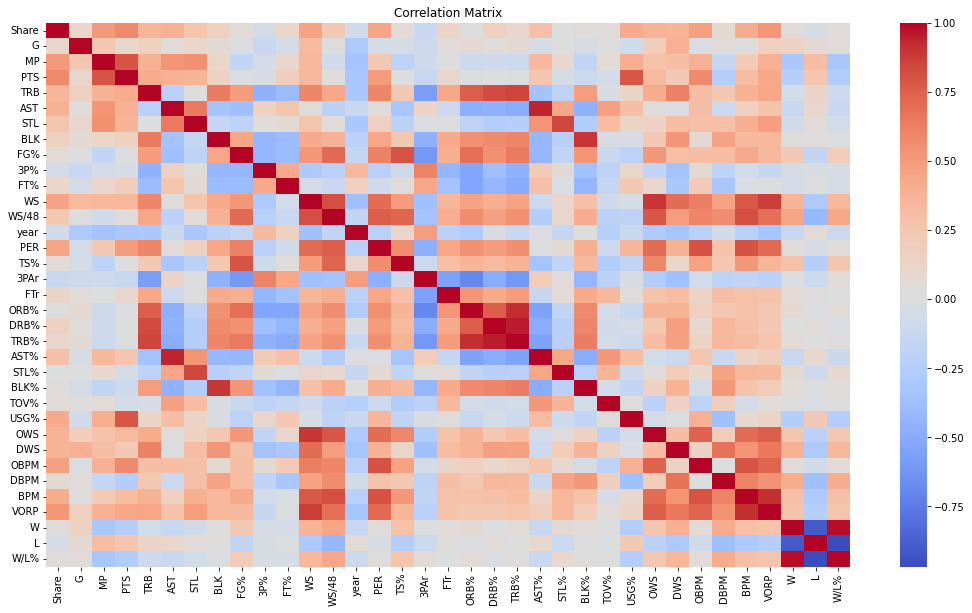

In [20]:
corr_matrix = master_table.corr()

#Create a mask to hide the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap using Seaborn
plt.figure(figsize = (18,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This correlation matrix only shows any linear relationship between 2 features. As expected, the general statistics such as points, rebounds, assists are important in designating the ROY. 
In terms of Advanced statistics, we see that the win shares, the player efficiency ranking (PER), the box plus minus (BPM) and the value over replacement have a linear relationship with the ROY Share. 

### Mutual information

After having a first look at the features compared to the ROY Share with the correlation matrix, we will now use the mutual information from scikit-learn to see if there is a way to build a measurable conection between a feature and a target. The advantage of MI is that it is model neutral which means it can be applied to various kinds of ML models.

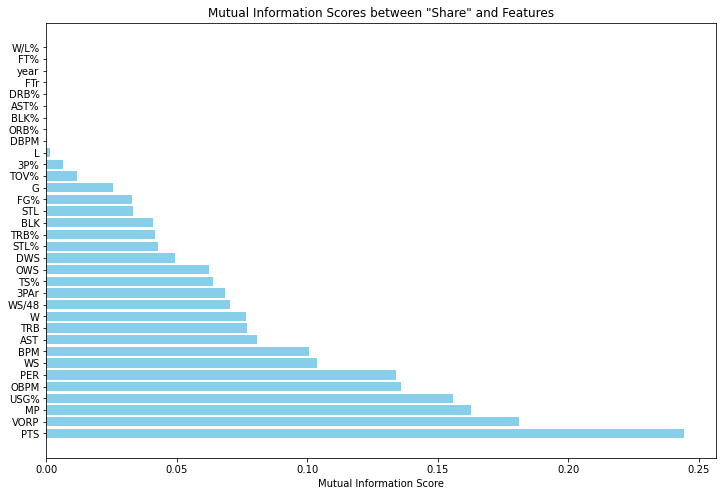

In [23]:

#Extract the target variable ("Share") and features
target = master_table['Share']
features = master_table.drop(['Share', 'Rank', 'Player', 'Tm', 'Pos'], axis=1)  # Exclude non-numeric columns

# Calculate mutual information scores
mi_scores = mutual_info_regression(features, target)

# Create a DataFrame with feature names and their mutual information scores
mi_df = pd.DataFrame({'Feature': features.columns, 'Mutual_Information': mi_scores})

# Sort the DataFrame by mutual information scores in descending order
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Plot the mutual information scores
plt.figure(figsize=(12, 8))
plt.barh(mi_df['Feature'], mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores between "Share" and Features')
plt.show()
